## Milwaukee Housing Data - Larissa Kidd 11/28/2023
### From https://data.milwaukee.gov/dataset/property-sales-data
Every year, the city of Milwaukee uploads a data file about which houses were sold in that past year. I want to compare 2002 against 2022 for a comparison of the 20 year difference and use 2012 for a 10 year difference between 2002 and 2022.

Background info about the variables:
Dataset information: Milwaukee historical housing sales.
Field Name =Description
PropertyID	= A unique identifier for each property.
PropType= The type of property (e.g., Commercial or Residential).
taxkey =The tax key associated with the property
Address = The address of the property.
CondoProject= Information about whether the property is part of a condominium	project (NaN indicates missing data).
District= The district number for the property.
nbhd= The neighborhood number for the property.
Style =The architectural style of the property.
Extwall =The type of exterior wall material used.
Stories =The number of stories in the building.
Year_Built =The year the property was built.
Rooms =The number of rooms in the property.
FinishedSqft =The total square footage of finished space in the property.
Units =The number of units in the property(e.g., apartments in a multifamily building) 
Bdrms =The number of bedrooms in the property.
Fbath =The number of full bathrooms in the property.
Hbath =The number of half bathrooms in the property.
Lotsize =The size of the lot associated with the property.
Sale_date =The date when the property was sold.
Sale_price =The sale price of the property.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data02 = pd.read_csv('2002-property-sales-data.csv')
data12 = pd.read_csv('2012-property-sales-data.csv')
data22 = pd.read_csv('2022-property-sales-data.csv')
data02.head()

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Commercial,3230461110,2628 N 6TH ST,NaN,6,6258,Commercial Exempt,NaN,2.0,1880,0,1840,1,0,0,0,12750,2002-01,15900
1,Commercial,3590192000,1363 N PROSPECT AV,NaN,3,6262,Mansions With Commercial Usage,NaN,2.0,1876,0,6377,1,0,0,0,11840,2002-01,850000
2,Commercial,4161194000,617 S 94TH ST,NaN,10,6272,Service Building,NaN,1.0,1954,0,5022,1,0,0,0,9700,2002-01,119000
3,Commercial,1719836000,3624 W SILVER SPRING DR,NaN,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1955,0,6420,1,0,0,0,8792,2002-01,210000
4,Commercial,3480290000,3830 W LISBON AV,NaN,15,6254,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1909,0,5956,1,0,0,0,4840,2002-01,48500


In [4]:
data12.head()

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Residential,1930715000,5271 N TEUTONIA AV,NaN,1,1160,Cape Cod,Aluminum / Vinyl,1.0,1940,0,1206,1,3,1,0,5880,2012-01,35000
1,Residential,2081312000,5138 N 40TH ST,NaN,1,1440,Ranch,Aluminum / Vinyl,1.0,1952,0,908,1,2,1,0,3270,2012-01,34507
2,Residential,2260831000,4463 N 66TH ST,NaN,2,1490,Cape Cod,Brick,1.0,1953,0,1512,1,3,2,0,5250,2012-01,112900
3,Residential,2120137000,7009 W VILLARD AV,NaN,2,1380,Cape Cod,Aluminum / Vinyl,1.0,1956,0,1326,1,4,1,0,4800,2012-01,67000
4,Residential,1440202000,9131 W EDGEWATER DR,NaN,2,480,Colonial,Aluminum / Vinyl,2.0,2003,0,1991,1,4,2,1,21571,2012-01,194800


In [5]:
data22.head()

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,98461,Manufacturing,30131000,9434-9446 N 107TH ST,NaN,9,6300,Service Building,Concrete Block,1.0,1978.0,NaN,20600.0,6,NaN,0,0,0,2022-04-01,950000.0
1,98464,Commercial,30152000,9306-9316 N 107TH ST,NaN,9,6202,Office Building - 1 Story,Brick,1.0,1982.0,NaN,9688.0,23,NaN,0,0,35719,2022-10-07,385000.0
2,98508,Residential,49980110,9327 N SWAN RD,NaN,9,40,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,1341648,2022-01-07,800000.0
3,98519,Residential,49993200,9411 W COUNTY LINE RD,NaN,9,40,Ranch,Aluminum/Vinyl,1.0,1959.0,6.0,1334.0,1,3.0,1,1,83200,2022-08-09,280000.0
4,98561,Residential,50042000,9322 N JOYCE AV,NaN,9,40,Ranch,Aluminum/Vinyl,1.0,1980.0,10.0,1006.0,1,6.0,1,0,8303,2022-05-23,233100.0


In [6]:
data22 = data22.rename(columns = {'taxkey':'Taxkey','nbhd':'Nbhd','Rooms':'Nr_of_rms','FinishedSqft':'Fin_sqft'})

In [7]:
data02.shape

(170, 19)

The shape of data02 is important to remember as the numbers are based off of much less data

In [8]:
data12.shape

(1996, 19)

In [9]:
data22.shape

(7146, 20)

In [10]:
#data22 = data22.drop(columns = 'PropertyID')

In [11]:
full_df = pd.concat([data02, data12, data22], keys=['2002 Housing Data','2012 Housing Data','2022 Housing Data'])
full_df

PropType      Taxkey                  Address  \
2002 Housing Data 0      Commercial  3230461110            2628 N 6TH ST   
                  1      Commercial  3590192000       1363 N PROSPECT AV   
                  2      Commercial  4161194000            617 S 94TH ST   
                  3      Commercial  1719836000  3624 W SILVER SPRING DR   
                  4      Commercial  3480290000         3830 W LISBON AV   
...                             ...         ...                      ...   
2022 Housing Data 7141  Condominium  7160339000          1912 W SALEM ST   
                  7142  Condominium  7160351000           6316 S 20TH ST   
                  7143  Condominium  7160365000           6376 S 20TH ST   
                  7144  Condominium  7160366000           6378 S 20TH ST   
                  7145  Condominium  7160375000           6354 S 20TH ST   

                           CondoProject  District  Nbhd  \
2002 Housing Data 0                 NaN         6  6258   
                  1                 NaN         3  6262   
                  2                 NaN        10  6272   
                  3                 NaN         1  6218   
                  4                 NaN        15  6254   
...                                 ...       ...   ...   
2022 Housing Data 7141  COLLEGE HEIGHTS        13  5360   
                  7142  COLLEGE HEIGHTS        13  5360   
                  7143  COLLEGE HEIGHTS        13  5360   
                  7144  COLLEGE HEIGHTS        13  5360   
                  7145  COLLEGE HEIGHTS        13  5360   

                                                                   Style  \
2002 Housing Data 0                                    Commercial Exempt   
                  1                       Mansions With Commercial Usage   
                  2                                     Service Building   
                  3     Store Bldg - Multi Story (Store & Apt, Store & O   
                  4     Store Bldg - Multi Story (Store & Apt, Store & O   
...                                                                  ...   
2022 Housing Data 7141                              Low Rise 1-3 Stories   
                  7142                              Low Rise 1-3 Stories   
                  7143                              Low Rise 1-3 Stories   
                  7144                              Low Rise 1-3 Stories   
                  7145                              Low Rise 1-3 Stories   

                       Extwall  Stories  Year_Built  Nr_of_rms  Fin_sqft  \
2002 Housing Data 0        NaN      2.0      1880.0        0.0    1840.0   
                  1        NaN      2.0      1876.0        0.0    6377.0   
                  2        NaN      1.0      1954.0        0.0    5022.0   
                  3        NaN      2.0      1955.0        0.0    6420.0   
                  4        NaN      2.0      1909.0        0.0    5956.0   
...                        ...      ...         ...        ...       ...   
2022 Housing Data 7141     NaN      2.0      1974.0       10.0    1100.0   
                  7142     NaN      1.0      1974.0        5.0    1379.0   
                  7143     NaN      2.0      1974.0       10.0    1100.0   
                  7144     NaN      2.0      1974.0        5.0    1100.0   
                  7145     NaN      1.0      1974.0        5.0    1141.0   

                        Units  Bdrms  Fbath  Hbath  Lotsize   Sale_date  \
2002 Housing Data 0         1    0.0      0      0    12750     2002-01   
                  1         1    0.0      0      0    11840     2002-01   
                  2         1    0.0      0      0     9700     2002-01   
                  3         1    0.0      0      0     8792     2002-01   
                  4         1    0.0      0      0     4840     2002-01   
...                       ...    ...    ...    ...      ...         ...   
2022 Housing Data 7141      1    4.0      1      1    

There exists some columsn with NaN so 

In [12]:
full_df = full_df.drop(columns = 'CondoProject')

In [13]:
full_df = full_df.drop(columns = 'Extwall')

In [14]:
full_df.head()

PropType      Taxkey                  Address  \
2002 Housing Data 0  Commercial  3230461110            2628 N 6TH ST   
                  1  Commercial  3590192000       1363 N PROSPECT AV   
                  2  Commercial  4161194000            617 S 94TH ST   
                  3  Commercial  1719836000  3624 W SILVER SPRING DR   
                  4  Commercial  3480290000         3830 W LISBON AV   

                     District  Nbhd  \
2002 Housing Data 0         6  6258   
                  1         3  6262   
                  2        10  6272   
                  3         1  6218   
                  4        15  6254   

                                                                Style  \
2002 Housing Data 0                                 Commercial Exempt   
                  1                    Mansions With Commercial Usage   
                  2                                  Service Building   
                  3  Store Bldg - Multi Story (Store & Apt, Store & O   
                  4  Store Bldg - Multi Story (Store & Apt, Store & O   

                     Stories  Year_Built  Nr_of_rms  Fin_sqft  Units  Bdrms  \
2002 Housing Data 0      2.0      1880.0        0.0    1840.0      1    0.0   
                  1      2.0      1876.0        0.0    6377.0      1    0.0   
                  2      1.0      1954.0        0.0    5022.0      1    0.0   
                  3      2.0      1955.0        0.0    6420.0      1    0.0   
                  4      2.0      1909.0        0.0    5956.0      1    0.0   

                     Fbath  Hbath  Lotsize Sale_date  Sale_price  PropertyID  
2002 Housing Data 0      0      0    12750   2002-01     15900.0         NaN  
                  1      0      0    11840   2002-01    850000.0         NaN  
                  2      0      0     9700   2002-01    119000.0         NaN  
                  3      0      0     8792   2002-01    210000.0         NaN  
                  4      0      0     4840   2002-01     48500.0         NaN

## (Beginning of Analysis Plan)

This first thing I want to demonstrate is the sale_price range for each year next to the propType

In [15]:
PropType = data02.groupby('PropType').count()['Taxkey']
PropType.index

Index(['Commercial', 'Lg Apartment', 'Residential', 'Vacant Land'], dtype='object', name='PropType')

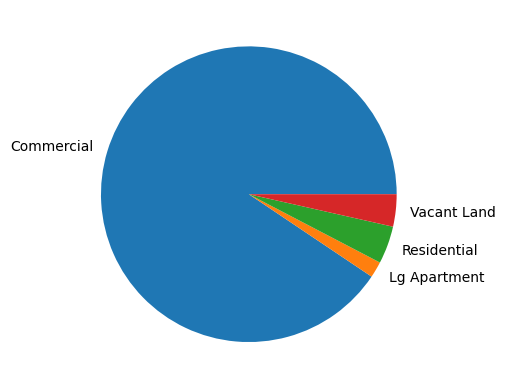

In [16]:
fig1, ax1 = plt.subplots()

ax1.pie(PropType.values,labels=PropType.index)

plt.show()

In [17]:
PropType12 = data12.groupby('PropType').count()['Taxkey']
PropType12.index

Index(['Commercial', 'Condominium', 'Lg Apartment', 'Residential',
       'Vacant Land'],
      dtype='object', name='PropType')

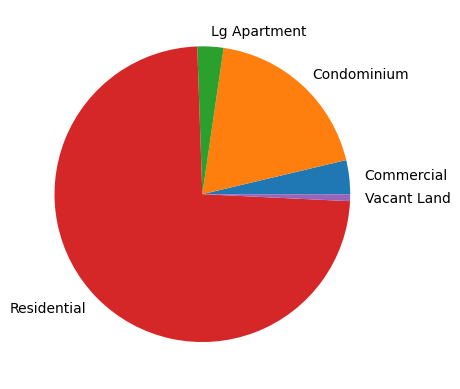

In [18]:
fig2, ax2 = plt.subplots()

ax2.pie(PropType12.values,labels=PropType12.index)

plt.show()

In [19]:
PropType22 = data22.groupby('PropType').count()['Taxkey']
PropType22.index

Index(['Commercial', 'Condominium', 'Exempt', 'Lg Apartment', 'Manufacturing',
       'Residential'],
      dtype='object', name='PropType')

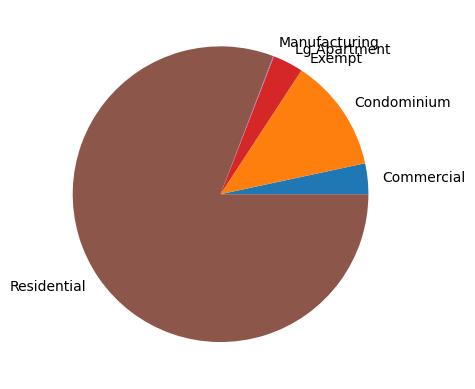

In [20]:
fig3, ax3 = plt.subplots()

ax3.pie(PropType22.values,labels=PropType22.index)

plt.show()

In [30]:
data2002 = data02[data02['Year_Built']!=0]
data2012 = data12[data12['Year_Built']!=0]
data2022 = data22[data22['Year_Built']!=0]

In [40]:
d2002 = data2002[data2002['Year_Built']!='NaN']
d2012 = data2012[data2012['Year_Built']!='NaN']
d2022 = data2022[data2022['Year_Built']!='NaN']

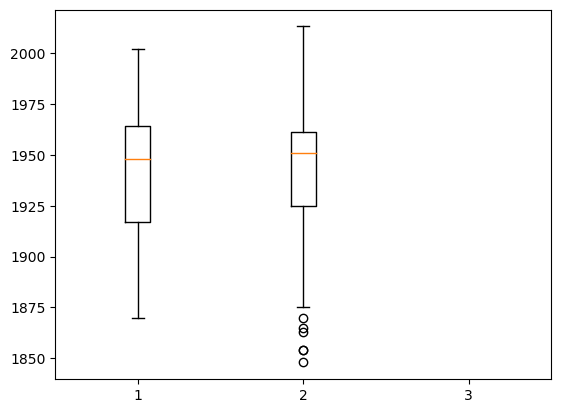

In [41]:
fig4, ax4 = plt.subplots()

ax4.boxplot(d2002['Year_Built'], positions = [1])
ax4.boxplot(d2012['Year_Built'], positions = [2])
ax4.boxplot(d2022['Year_Built'], positions = [3])

plt.show()

I can't seem to figure out why the 2022 data won't work on this graph

In [42]:
d2022.keys()

Index(['PropertyID', 'PropType', 'Taxkey', 'Address', 'CondoProject',
       'District', 'Nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built',
       'Nr_of_rms', 'Fin_sqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize',
       'Sale_date', 'Sale_price'],
      dtype='object')

For the next graph, I tried to adjust the x and y limits to show a zoomed in look because they are clumped in the bottom left but I feel as though this demonstrates the 1:1 ratio with finished sq ft and lot size while also show the few cases where the lot size is bigger than the finished sq ft. I like this graph and tried different variables but I ultimately chose these two

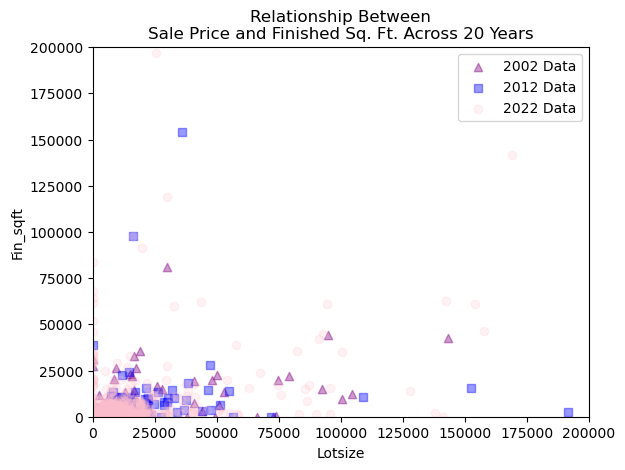

In [27]:
fig5, ax5 = plt.subplots()
ax5.scatter(x = data02['Lotsize'], 
            y = data02['Fin_sqft'],
            label = '2002 Data', color = 'purple', 
            marker = '^', alpha = .4)
ax5.scatter(x = data12['Lotsize'],
           y = data12['Fin_sqft'], 
            label = '2012 Data', color = 'blue', 
            marker = 's', alpha = .4)
ax5.scatter(x = data22['Lotsize'],
           y = data22['Fin_sqft'], 
            label = '2022 Data', color = 'pink', 
            marker = 'o', alpha = .2)

ax5.set_xlabel('Lotsize')
ax5.set_ylabel('Fin_sqft')

ax5.set_xlim(left=0,right=200000)
ax5.set_ylim(bottom =0,top=200000)

ax5.set_title('Relationship Between\nSale Price and Finished Sq. Ft. Across 20 Years')
ax5.legend()

plt.show()

I might reorder the graphs because it makes sense for this to be earlier in the report, but this is just comparing the different districts and how often a house is sold. I could also add a graph explaining the average Sale_price is for each District.

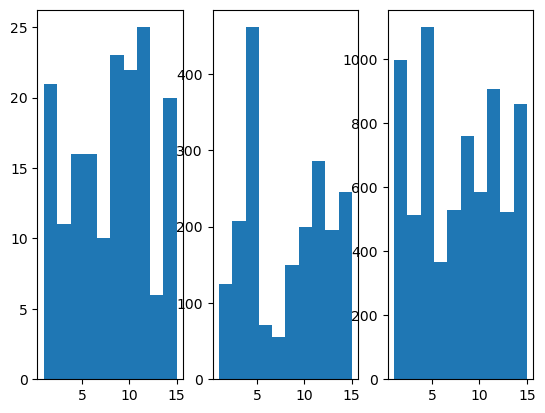

In [25]:
fig6, ax6 = plt.subplots(1,3)

ax6[0].hist(data02['District'])
ax6[1].hist(data12['District'])
ax6[2].hist(data22['District'])

plt.show()